##Я - тетрадка, которая всё запускает

Dependencies:
* Python 2, Ipython notebook
* Docker, nshou/elasticsearch-kibana
* numpy, ROOT, root_numpy, zmq


How to launch a ES+kibana container:
* sudo docker run -d -p 9200:9200 -p 5601:5601 nshou/elasticsearch-kibana
  


###запуск сервера zmq
* просто кладёт входные пакеты в очередь и отдаёт их по мере просьб "get"
* периодически меняет run number
* клиент-обёртка zmq_client.py
* zmq.REP

In [1]:
import os
os.system('python indexer/zmq_event_bus.py &')

0

###Запуск клиента-складывателя всего в ES
* процесс-индексатор, который читает события пакетами из zmq_event_bus и пишет в ElasticSearch
* Имя индекса - "run"+run_number
* Недостающие индексы создаются

In [2]:
import indexer.indexer as indexer

In [3]:
inder = indexer.Indexer(verbose=True)
#начинаем складывать ивенты в индексы. 
inder.start_indexing()

run id recieved: 15000
new index created: run15000
processing events...
1

 events indexed in current run_id
run id recieved: 15001
new index created: run15001
processing events...
456 events indexed in current run_id
processing events...
1026 events indexed in current run_id
processing events...
1159 events indexed in current run_id
processing events...
1525 events indexed in current run_id
processing events...
2242 events indexed in current run_id
processing events...
2842 events indexed in current run_id
processing events...
3382 events indexed in current run_id
processing events...
4214 events indexed in current run_id
processing events...
4787 events indexed in current run_id
processing events...
5019 events indexed in current run_id
processing events...
5355 events indexed in current run_id
processing events...
6153 events indexed in current run_id
processing events...
6617 events indexed in current run_id
processing events...
7128 events indexed in current run_id
processing events...
7705 events indexed in current run_id
processing events...
8098 event

 events indexed in current run_id
run id recieved: 15002
new index created: run15002
processing events...
631 events indexed in current run_id
processing events...
1296 events indexed in current run_id
processing events...
2115 events indexed in current run_id
processing events...
2203 events indexed in current run_id
processing events...
2779 events indexed in current run_id
processing events...
3088 events indexed in current run_id
processing events...
3375 events indexed in current run_id
processing events...
3819 events indexed in current run_id
processing events...
4463 events indexed in current run_id
processing events...
5033 events indexed in current run_id
processing events...
5477 events indexed in current run_id
processing events...
5852 events indexed in current run_id
processing events...
6665 events indexed in current run_id
processing events...
7213 events indexed in current run_id
processing events...
7685 events indexed in current run_id
processing events...
8370 event

 events indexed in current run_id
run id recieved: 15003
new index created: run15003
processing events...
123 events indexed in current run_id
processing events...
398 events indexed in current run_id
processing events...
767 events indexed in current run_id
processing events...
1330 events indexed in current run_id
processing events...
1397 events indexed in current run_id
processing events...
1953 events indexed in current run_id
processing events...
2138 events indexed in current run_id
processing events...
2431 events indexed in current run_id
processing events...
3066 events indexed in current run_id
processing events...
3528 events indexed in current run_id
processing events...


KeyboardInterrupt: 

#Web-presenter
* может выводить произвольный набор из графиков и HTMLя
* wev написан на mpld3 + flask
* после запуска выглядывает из http://localhost:5000
* на хромбуке на 2 гистограммы по ~10^5 точек и 2 хитмапа по ~10^5 пар точек строились за ~1.1 секунду

In [4]:
#запуск сервера (flask + mpld3)
os.system("cd presenter && python routes.py &")

0

In [5]:
from IPython.core.display import HTML
HTML('<a target="_blank" href="http://localhost:5000">web-presenter(local)</a>')

###Event mapping
* каждое событие пишется в индекс внутри ElasticSearch
* id события - порядковый номер его получения внутри run_id (todo: мб eventNumber?)
* маппинг события теперь имеет 100 Очень Осмысленных полей (сампл с рандомной гистограммы):

In [6]:
import indexer.event as event
len(event.es_event_mapping['properties'])

103

###Howto use kibana directly:
* kibana висит на http://localhost:5601
* После первого запуска кибана попросит Configure an index pattern
 * убрать галочку index contains time-based events
 * поставить дефолтный паттерн * (или просто по вкусу), 
 * нажать "Create"
* Как построить простую гистограмму
 * наверху тык Visualize -> Vertical Bar Chart -> from new search
 * в buckets тык X Axis; 
 * Aggregation <- Histogram
 * Field <- интересующее поле (например, muonHits)
 * Interval <- 1 (или сколько хочется отдать по X на 1 бин гистограммы)
 * тык зелёную кнопку Play (треугольник) выше
* а вообще https://www.elastic.co/guide/en/kibana/current/getting-started.html


#ipython visualization

In [7]:
import elasticsearch
import presenter.visualize as visualize
%matplotlib inline
es = elasticsearch.Elasticsearch(["localhost:9200"])

CPU times: user 152 ms, sys: 8 ms, total: 160 ms
Wall time: 250 ms


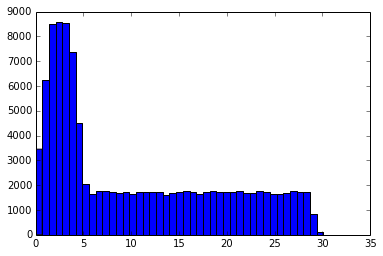

In [8]:
%%time
_=visualize.plot_1d_hist("avgMass",0,70,100,es,"run*")

CPU times: user 56 ms, sys: 0 ns, total: 56 ms
Wall time: 202 ms


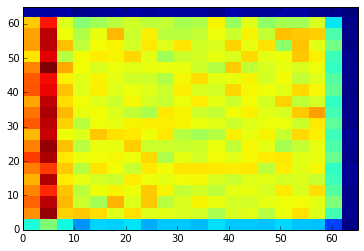

In [9]:
%%time
xmin,xmax = 0,65
xbins = 20
xname = "hcalEnergy"
ymin,ymax = 0,65
ybins = 20
yname = "muonHits"
_=visualize.plot_2d_hist(xname,xmin,xmax,xbins,yname,ymin,ymax,ybins,es,index="run*")
